In [67]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

CWD = os.path.dirname(os.path.realpath(__name__))

# TODO Set filepath to data csv
DATA_CSV = f"{CWD}/TennisData/wta_matches_qual_itf_2019.csv"

df_data = pd.read_csv(DATA_CSV)
cols = list(df_data.columns)

SAVE_DIR = CWD + "/" + DATA_CSV.split("/")[-1].strip(".csv") + "_EDA"
try:
    os.mkdir(SAVE_DIR)
except FileExistsError:
    pass

# TODO Set to true if want to write dfs and plots to file.
SAVE_DATA = True


/tmp/ipykernel_24699/297287631.py:12: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv(DATA_CSV)


In [68]:
# CSV shape, , columns, head
print(f"Shape: {df_data.shape}")
print(f"Columns: {list(df_data.columns)}")

if SAVE_DATA:
    df_data.head().to_csv(SAVE_DIR+"/data_head.csv")

print(df_data.head())

Shape: (29392, 49)
Columns: ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']
  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  2019-1059       Taipei    Hard         32             C      20191111   
1  2019-1059       Taipei    Hard         32             C      20191111   
2  2019-1059       Taipei    Hard         32             C      20191111   
3  2019-1059       Taipei    Hard  

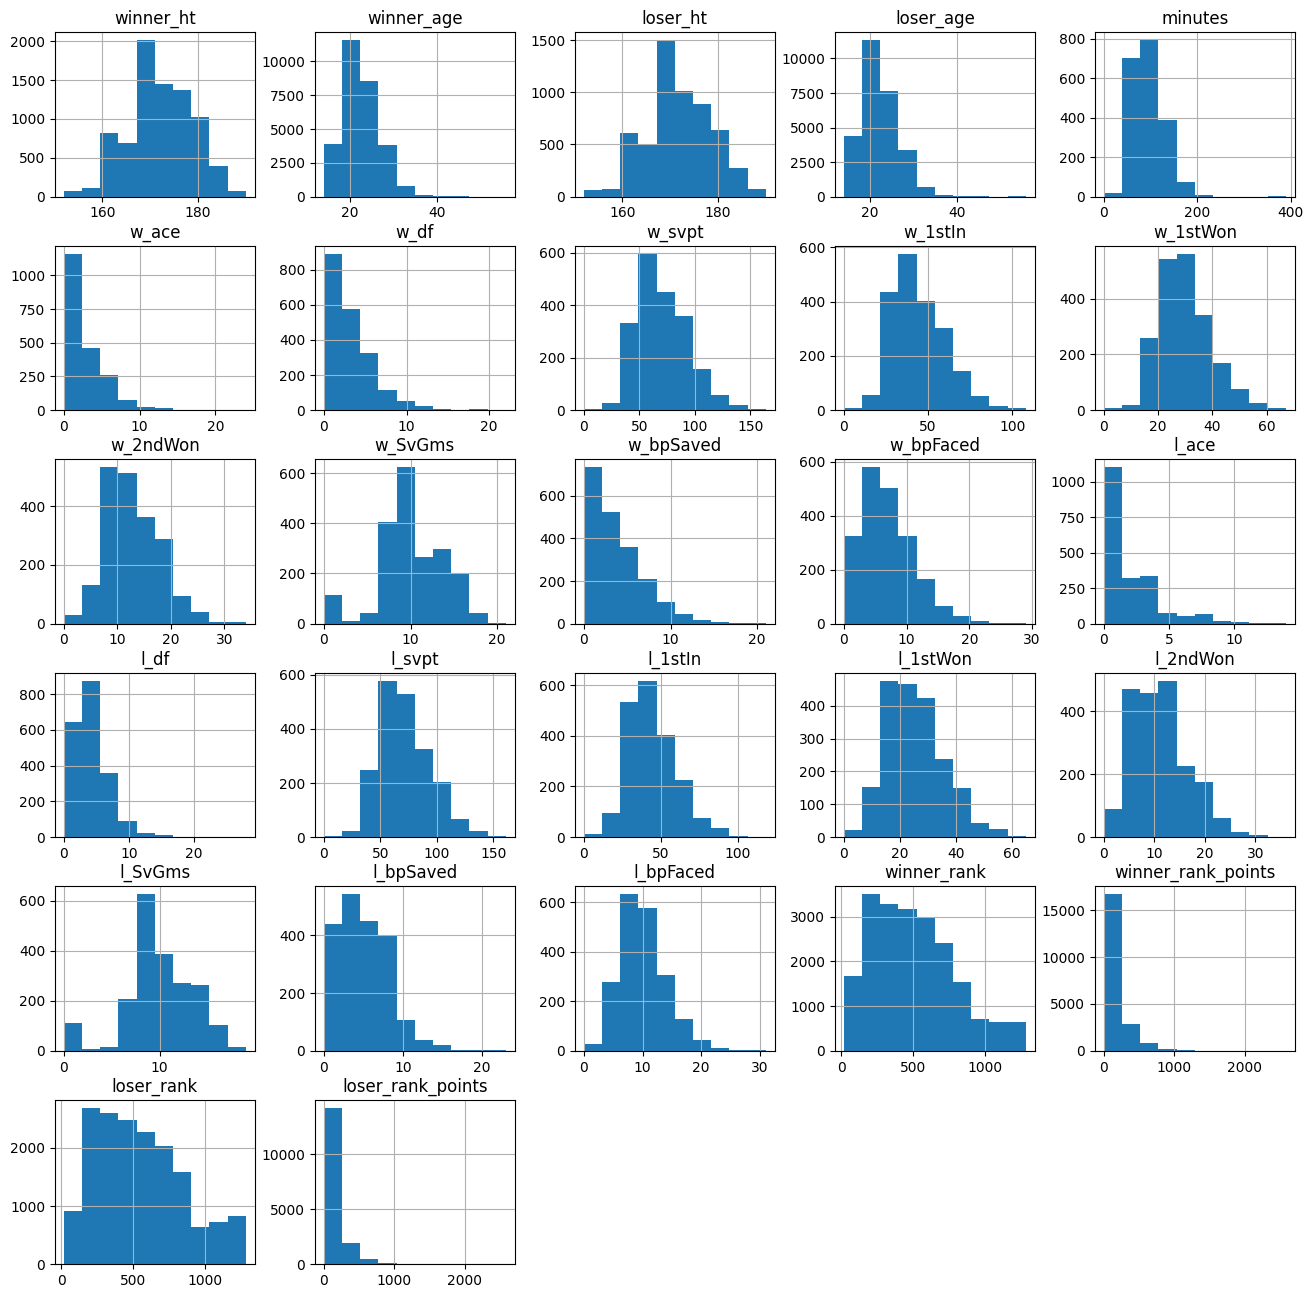

In [69]:
# Drop unwnted columns
dropped_cols = ["tourney_id", "tourney_name", "draw_size", "tourney_date", "match_num", "winner_id", "loser_id", "winner_seed", "loser_seed", "winner_entry", "loser_entry", "winner_name", "loser_name", "winner_ioc", "loser_ioc", "best_of", "round", "score"]

selected_df_data  = df_data.drop(dropped_cols, axis=1)
selected_df_data.hist(figsize=(16,16))
if SAVE_DATA:
    plt.savefig(SAVE_DIR+"/numeric_cols_histogram.png")
plt.show()

In [70]:
output = selected_df_data.describe()
print(output)

if SAVE_DATA:
    output.to_csv(SAVE_DIR+"/numeric_cols_description")

         winner_ht    winner_age     loser_ht     loser_age      minutes  \
count  7993.000000  28686.000000  5629.000000  27526.000000  1984.000000   
mean    172.009884     22.422084   171.748801     22.164880    94.625000   
std       6.663177      4.012741     6.703657      4.165701    32.404629   
min     152.000000     14.000000   152.000000     14.000000     0.000000   
25%     168.000000     19.200000   168.000000     18.900000    70.000000   
50%     171.000000     21.900000   171.000000     21.500000    89.000000   
75%     178.000000     25.000000   176.000000     24.700000   115.000000   
max     190.000000     55.700000   190.000000     55.700000   389.000000   

             w_ace         w_df       w_svpt      w_1stIn     w_1stWon  ...  \
count  2003.000000  2003.000000  2003.000000  2003.000000  2003.000000  ...   
mean      2.694958     3.336995    69.983525    44.260110    29.810784  ...   
std       2.688138     2.618188    22.736035    15.707737     9.333088  ...   

In [71]:
# Summary statistics of categorial variables
categorical_summary = selected_df_data.describe(include='object') 
print(categorical_summary)

if SAVE_DATA:
    categorical_summary.to_csv(SAVE_DIR+"/categorical_cols_description")

       surface tourney_level winner_hand loser_hand
count    29392         29392       29392      29392
unique       4            10           3          3
top       Hard            15           R          R
freq     15036         13193       16508      14177


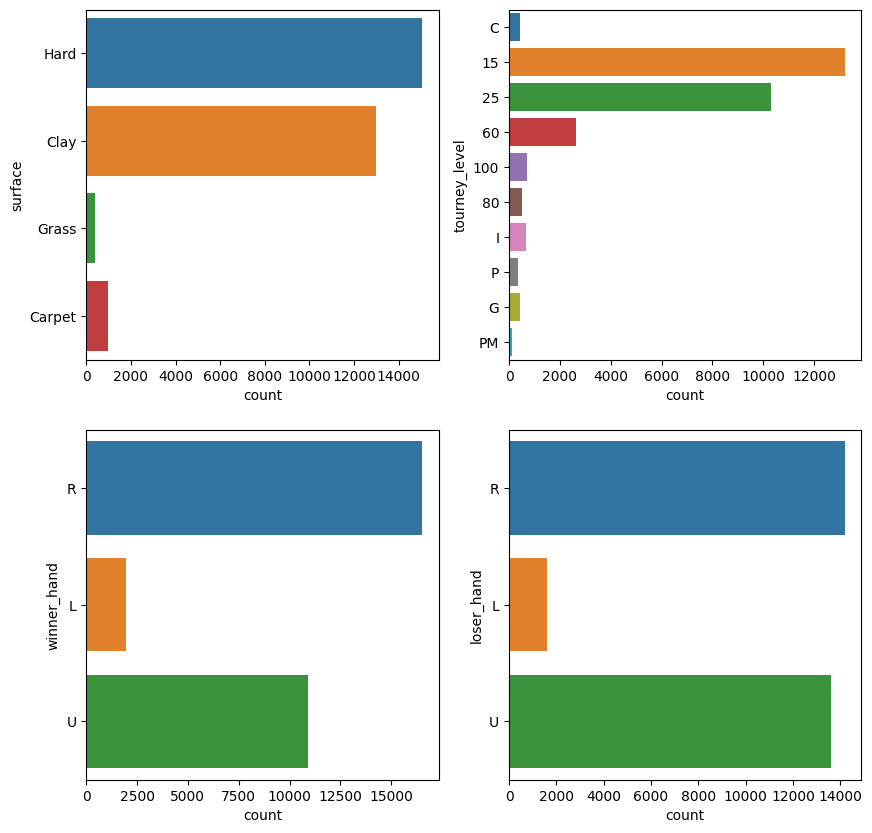

In [72]:
rows = 2
columns = 2
row_idx = 0
col_idx = 0

fig, axes = plt.subplots(rows, columns, figsize=(10, 10))

for col in selected_df_data.select_dtypes(include='object'):
    sns.countplot(y=col, data=selected_df_data, ax=axes[row_idx, col_idx])
    if col_idx + 1 == columns:
        col_idx = 0
        row_idx += 1
    else:
        col_idx += 1

if SAVE_DATA:
    plt.savefig(SAVE_DIR+"/categorical_cols_histogram.png")

31 interested columns


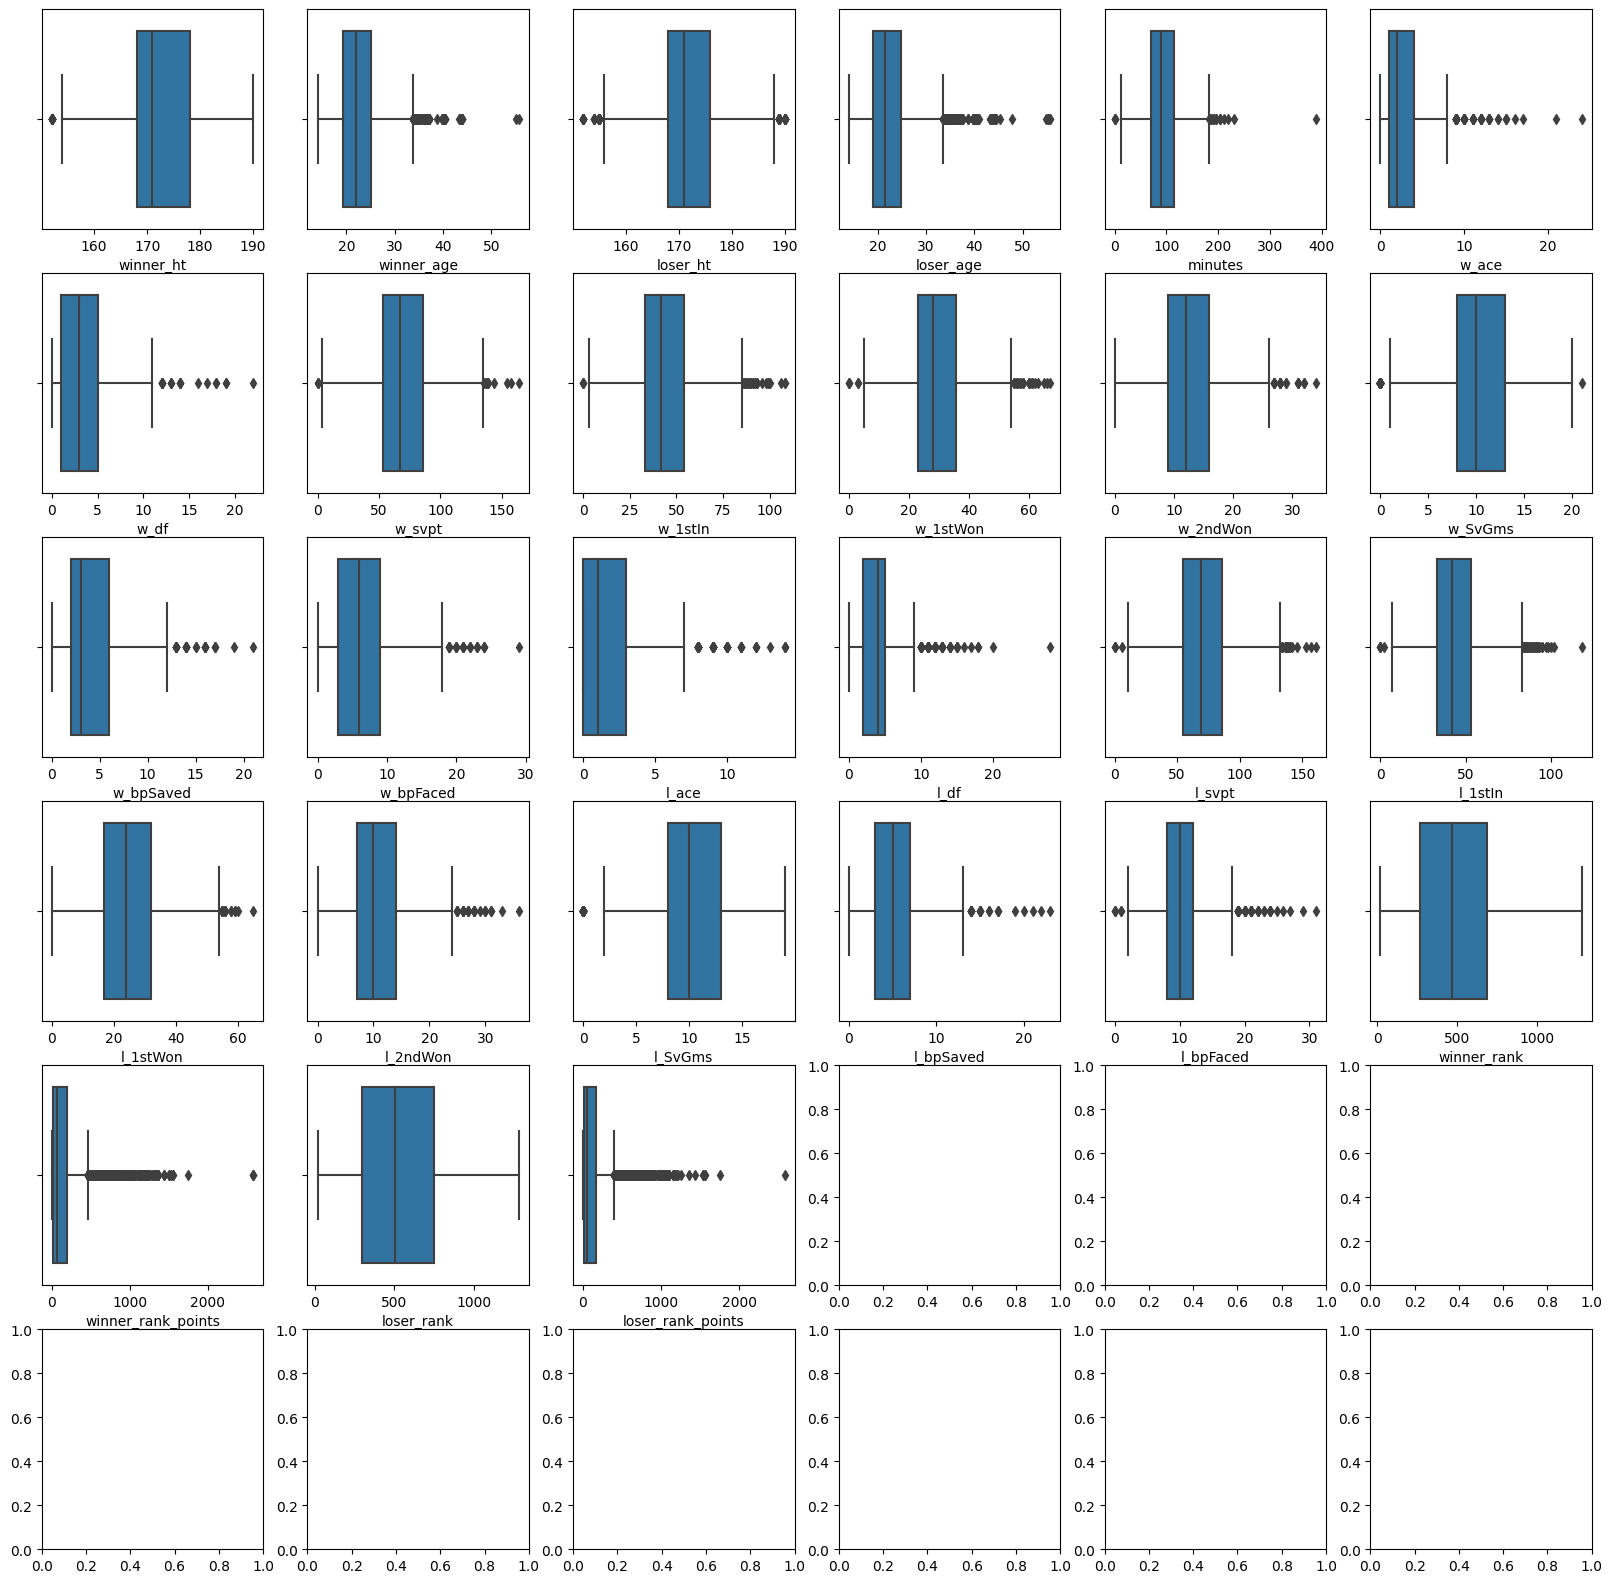

In [73]:
# Boxplot
interested_cols = [colname for colname in cols if colname not in dropped_cols]
print(f"{len(interested_cols)} interested columns")

rows = 6
columns = 6
row_idx = 0
col_idx = 0

fig, axes = plt.subplots(rows, columns, figsize=(20, 20))

for col in interested_cols:
    try:
        sns.boxplot(x = col, data=selected_df_data, ax=axes[row_idx, col_idx])
        if col_idx + 1 == columns:
            col_idx = 0
            row_idx += 1
        else:
            col_idx += 1
    except TypeError:
        pass

if SAVE_DATA:
    plt.savefig(SAVE_DIR+"/boxplots")

In [74]:
# Correlation for numeric features
corr = selected_df_data.corr()

if SAVE_DATA:
    corr.to_csv(SAVE_DIR+"/correlations.csv")

corr

/tmp/ipykernel_24699/3318393266.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = selected_df_data.corr()


,winner_ht,winner_age,loser_ht,loser_age,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
winner_ht,1.000000,-0.063676,0.015648,0.019898,-0.022001,0.261330,0.043857,0.003004,-0.029212,0.029076,...,0.024782,0.062946,0.020930,-0.003745,0.046294,-0.004627,-0.082227,0.106971,-0.064007,0.072354
winner_age,-0.063676,1.000000,0.004580,0.128881,0.019619,-0.058101,-0.003375,-0.007306,0.026091,0.017726,...,-0.006990,-0.035365,0.023572,0.005456,0.003310,0.020497,-0.317758,0.263585,-0.210410,0.181065
loser_ht,0.015648,0.004580,1.000000,-0.054192,-0.028688,-0.012162,0.033532,-0.011384,-0.008748,0.035559,...,-0.034990,0.032153,0.053765,0.006277,0.016244,-0.043109,-0.067206,0.065903,-0.091321,0.104771
loser_age,0.019898,0.128881,-0.054192,1.000000,0.023187,0.021120,0.021618,-0.002948,-0.000449,-0.010982,...,0.026178,0.010861,-0.046276,-0.012264,-0.005670,-0.004431,-0.244121,0.219853,-0.308836,0.245575
minutes,-0.022001,0.019619,-0.028688,0.023187,1.000000,0.115371,0.432033,0.894691,0.828458,0.774863,...,0.815664,0.810064,0.678694,0.645421,0.407029,0.459241,0.056739,-0.055152,-0.073630,0.042920
w_ace,0.261330,-0.058101,-0.012162,0.021120,0.115371,1.000000,0.113689,0.199023,0.082759,0.220445,...,0.174882,0.247899,0.200262,0.131067,0.041225,-0.048119,-0.033855,0.064101,-0.052959,0.034249
w_df,0.043857,-0.003375,0.033532,0.021618,0.432033,0.113689,1.000000,0.468436,0.320809,0.321353,...,0.341935,0.328974,0.289646,0.287134,0.186361,0.251945,0.067123,-0.057608,0.007816,0.020113
w_svpt,0.003004,-0.007306,-0.011384,-0.002948,0.894691,0.199023,0.468436,1.000000,0.927546,0.885174,...,0.764528,0.791951,0.661203,0.654236,0.299935,0.343986,0.058449,-0.059550,-0.107421,0.075753
w_1stIn,-0.029212,0.026091,-0.008748,-0.000449,0.828458,0.082759,0.320809,0.927546,1.000000,0.936936,...,0.717536,0.733565,0.590690,0.610010,0.269752,0.320193,0.063761,-0.080026,-0.110219,0.078099
w_1stWon,0.029076,0.017726,0.035559,-0.010982,0.774863,0.220445,0.321353,0.885174,0.936936,1.000000,...,0.686678,0.757568,0.626891,0.585398,0.240594,0.216249,0.065942,-0.068542,-0.097063,0.066352


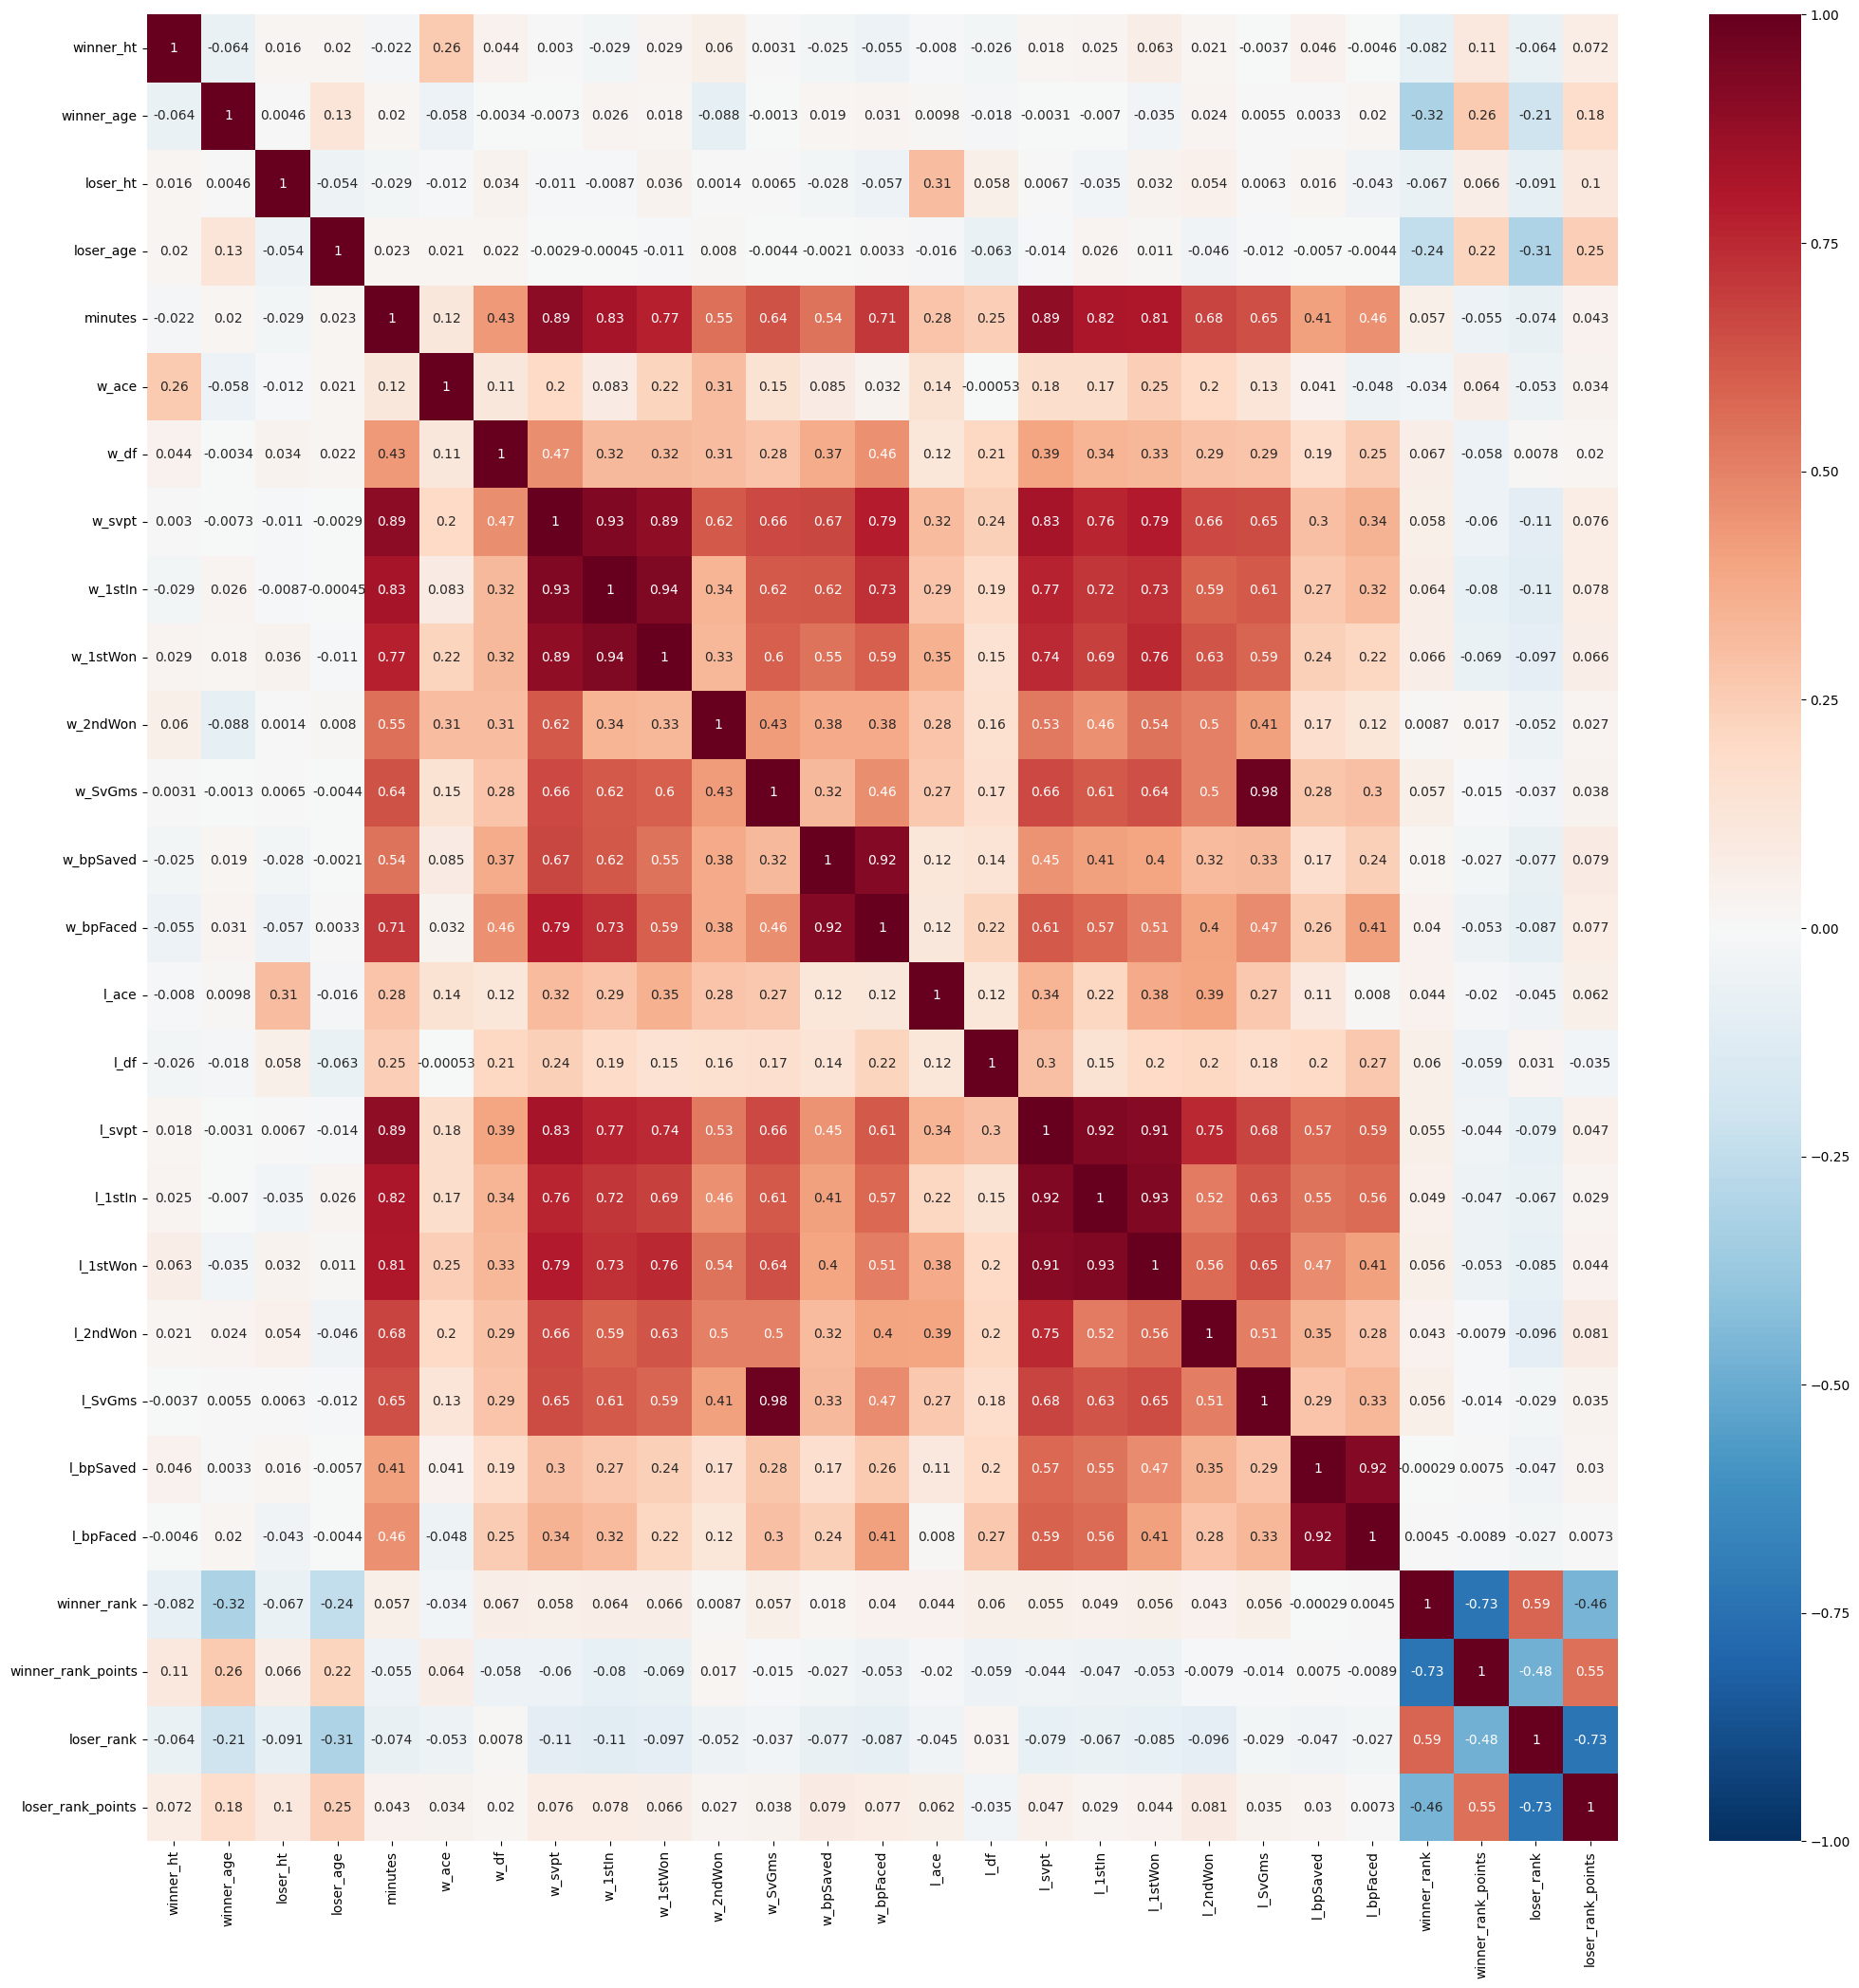

In [75]:
# Correlation heat map
plt.figure(figsize=(25,25))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)

if SAVE_DATA:
    plt.savefig(SAVE_DIR+"/correlation_heatmap.png")

plt.show()